In [1]:
#Lets import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#loading dataset from csv to pandas dataframe
body = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\bodyfat.csv")

In [3]:
#print first 5 rows of dataset
body.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
body.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [5]:
#total rows & columns in datast
body.shape

(252, 15)

In [6]:
#getting statistical info
body.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
#finding the null value
body.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
data = body.copy()

## Data Pre-processing

In [10]:
data = body.drop(columns=['Density','BodyFat'],axis=1)
features = list(data.columns)

In [11]:
data.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


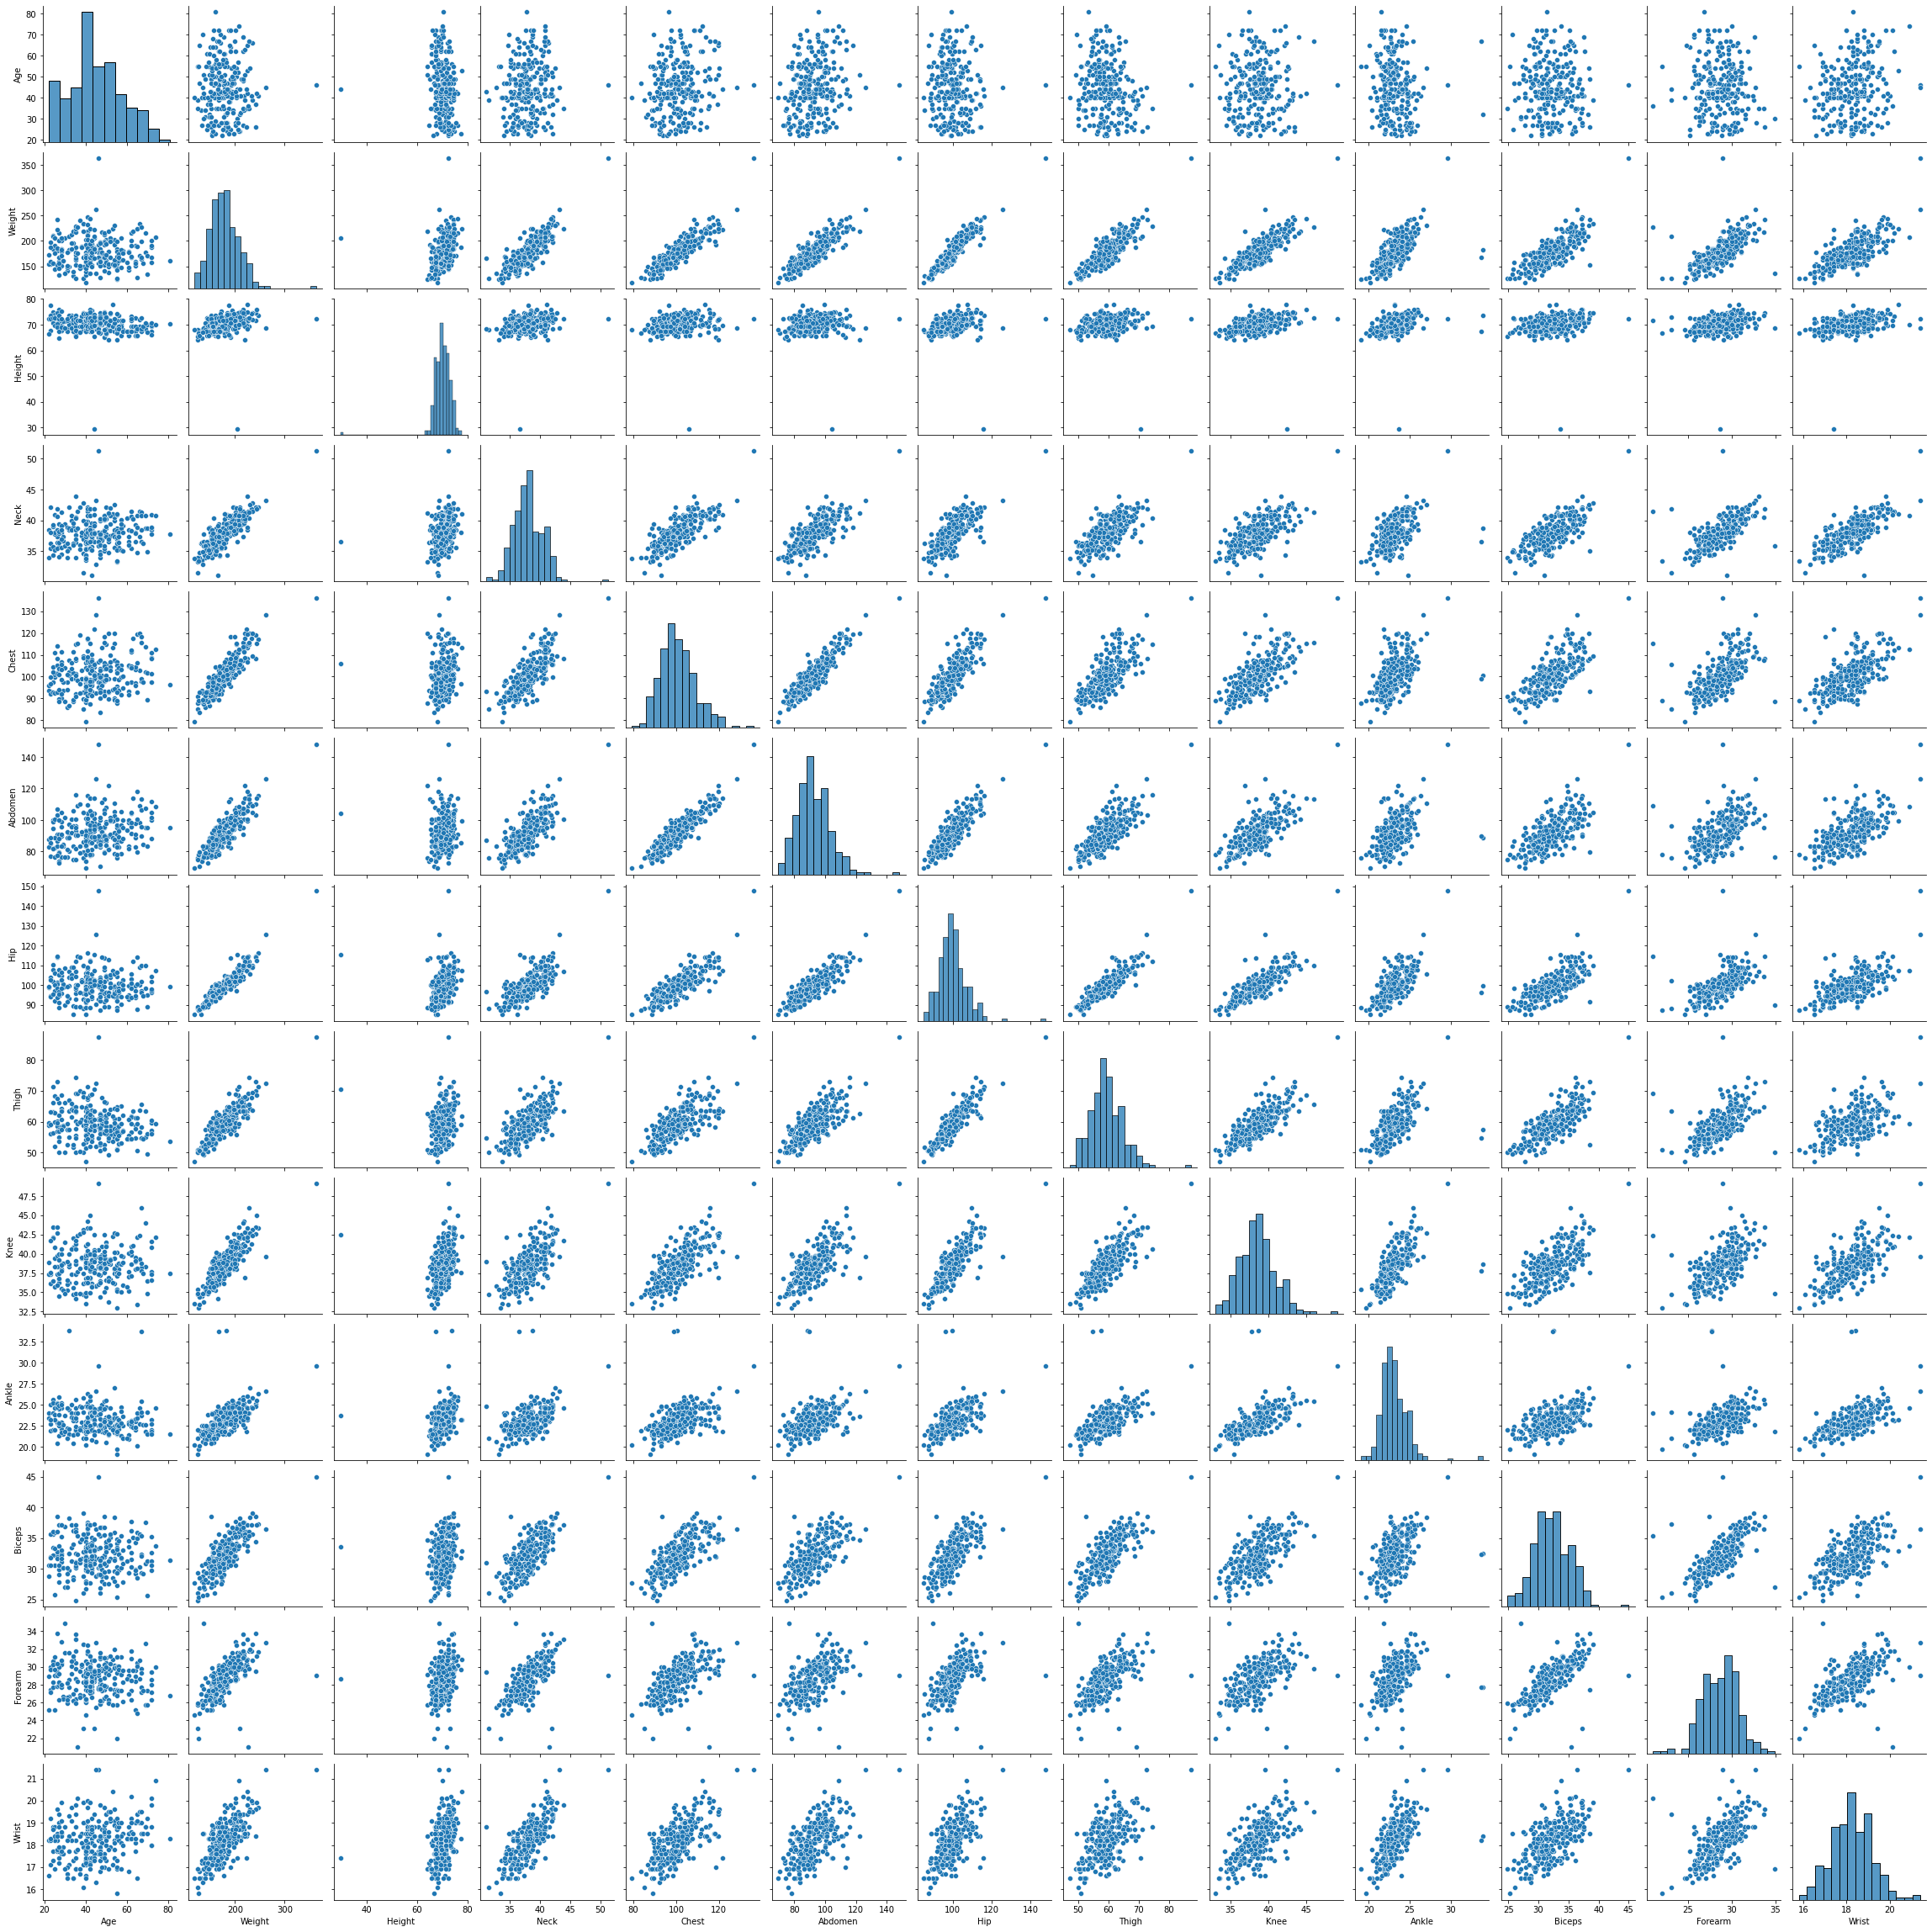

In [12]:
sns.pairplot(data)

In [13]:
#finding correlation
correlation = body[features].corr(method='spearman')

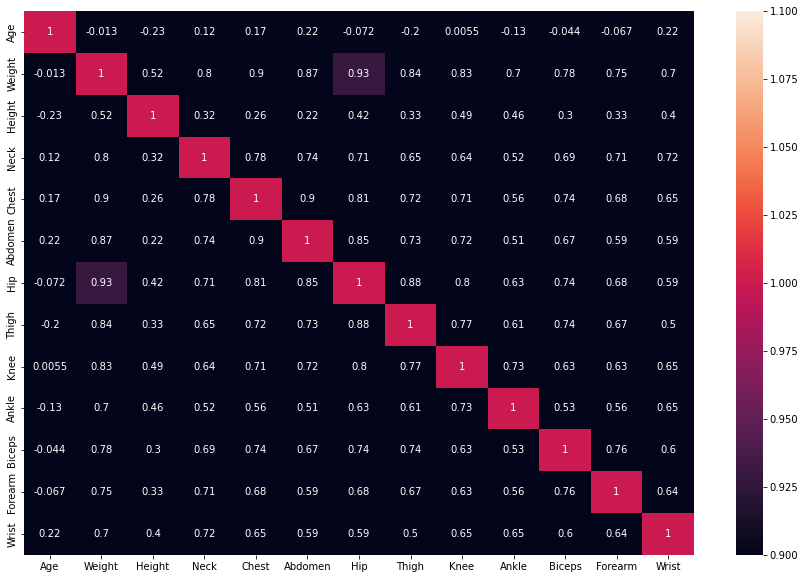

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,vmin=1,vmax=1)
plt.show()

No feature is correlated to another feature , hence all the features can be taken for our analysis

In [15]:
#splitting Features & Target
X = data
Y = body['BodyFat']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

## Model Training

In [17]:
logs= []

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
#test data accuracy
y_predict = model.predict(X_test)
score = model.score(X_test,Y_test)

In [25]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,y_predict,squared=False)

In [27]:
print("Accuracy on the Linear Regression: ",score)
print("Mean squared Error: ",rmse)

Accuracy on the Linear Regression:  0.6353780797292601
Mean squared Error:  4.451317843688738


In [28]:
### LASSO

In [29]:
from sklearn.linear_model import Lasso

In [30]:
model2 = Lasso()

In [31]:
model2.fit(X_train,Y_train)

Lasso()

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_score = cross_val_score(model2,X_train,Y_train,cv=10)
y_pred = model2.predict(X_test)
score = model2.score(X_test,Y_test)
rmse = mean_squared_error(Y_test,y_predict,squared=False)

In [35]:
print("CV Score ",cv_score)
print("Lasso Accuracy: ",score)
print("RMSE : ",rmse)

CV Score  [0.83781073 0.71769883 0.72229153 0.36638554 0.79687897 0.82048582
 0.60255413 0.74571386 0.72640604 0.68011693]
Lasso Accuracy:  0.6353780797292601
RMSE :  4.451317843688738
